# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- ipywidgets and ipykernel if necessary
- Starter Code was tested on Python 3.11.5

In [1]:
import random
import numpy as np
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tqdm import tqdm

# 1: Complete the Implementation of the Four Rooms environment 

- The FourRooms is implemented as a python class. We explain the attributes and methods as follows
    - **init** function: Define all the attributes of the Four Rooms environment. For example, the state space, the action space, the start state, the goal state and so on.
    - **reset** function: Resets the agent to the start state (0, 0)
    - **step** function: Takes the current state and one action, returns the next state and a reward
   
- Please complete the implementation in the step function.

In [2]:
# FOUR ROOM ENVIRONMENT
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
        
        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}
        
        # define the start state
        self.start_state = [0, 0]
        
        # define the goal state
        self.goal_state = [10, 10]
        

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        state = self.start_state  # reset the agent to [0, 0]
        reward = 0  # reward is 0
        return state, reward
        

    def step(self, state, act):
        """
        Args: 
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        
        # CODE HERE: implement the stochastic dynamics as described in Q1. 
        # Please note, we provide you with the deterministic transition function "take_action" below.
        # Therefore, you only have to implement the logics of the stochasticity.
        
        intended_move = self.action_space[act]
        
        # decide the perpendicular moves based on the chosen action.
        # If the action are UP or DOWN the robot moves will be LEFT and RIGHt (perpendicular directions).
        
        if act == 'UP' or act == 'DOWN':
            side_moves = [self.action_space['LEFT'], self.action_space['RIGHT']]  
        else:  
            # If the action is 'LEFT' or 'RIGHT', the perpendicular moves are 'UP' and 'DOWN'.
            side_moves = [self.action_space['UP'], self.action_space['DOWN']] 
     
        # Randomly choose the actual move based on the probabilities
        # 80% chance to move in the intended direction 
        # 10% chance to move in one of the perpendicular directions (side moves).       
        move = random.choices([intended_move, side_moves[0], side_moves[1]], weights=[0.8, 0.1, 0.1])[0]

        # find the new positions by adding the selected movement into the current state.
        new_position = np.array(state) + move

        # Then it convertes new position from numpy array to a list. because of state representation.
        next_state = new_position.tolist()
        
        # Check if the new state is a valid state
        # If it's not a valid state, the agent remains in the current state.
        if next_state not in self.state_space:
            next_state = state  

        # CODE HERE: compute the reward based on the resulting state
        
        # if the agent reache the goal state (10, 10) it gets reward  1 and reset the agent to the start state (0, 0).
        if next_state == self.goal_state:
            reward = 1
            next_state = self.start_state  # Reset the agent to the starting position.
        else:
        # If the agent not reach the goal stat reward is 0.
            reward = 0

        # return the current state, reward
        return next_state, reward
        

    """ DO NOT CHANGE BELOW """
    def take_action(self, state, act):
        """
        Input args: 
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

In [3]:
"""Here is the plot function you can use to generate the figure. DO NOT CHANGE"""
# PLOT FUNCTION
def plot_func(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

# 2 Implement the manual policy

Use this to check your whether your implementation of the step function is correct.

<span style="color:red">To exit the loop, please write down in the input box "exit" or "quit."</span>


In [4]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()
    state, reward = env.reset()  # always call reset() before interaction
    
    # manual time step (YOU CAN CHANGE THIS TO ANY TIME STEP YOU WANT)
    time_step = 100

    # create a loop
    for t in range(time_step):
        
        action = input("Enter your action (UP, DOWN, LEFT, RIGHT) or type 'exit' or 'quit' to stop: ").upper()

        # Re-prompt the user until a valid action is entered or until they choose to exit
        while action not in ['UP', 'DOWN', 'LEFT', 'RIGHT', 'EXIT', 'QUIT']:
            print("Invalid action! Please choose from: UP, DOWN, LEFT, RIGHT or type 'exit' or 'quit' to stop")
            action = input("Enter your action: ").upper()

        # Check if the user wants to exit
        if action in ['EXIT', 'QUIT']:
            print("Exiting the loop.")
            break
        # CODE HERE: implement the code to interact with the Four Rooms environment above.
        # it should takes in the current state and action and returns the next_state and a reward
        # Hint: use the step function that you implement.
        next_state, reward = env.step(state,action)

        """DO NOT CHANGE BELOW"""
        # print interaction
        print(f"Step = {t}, state = {state}, action = {action}, next state = {next_state}, reward = {reward}")
        
        # reset if the agent reaches the goal
        if reward == 1:
            print("Reset the agent to the start state!")
            state, reward = env.reset()
        else:
            state = next_state

Invalid action! Please choose from: UP, DOWN, LEFT, RIGHT or type 'exit' or 'quit' to stop
Step = 0, state = [0, 0], action = UP, next state = [1, 0], reward = 0
Exiting the loop.


# 3 Implement a random policy

We provide the scaffolding code for running and plotting. Please implement a random policy

**Please note: you should read the code carefully before implementing to make sure the variable names are aligned.**

Trial 1: Total cumulative reward for random policy = 7
Trial 2: Total cumulative reward for random policy = 6
Trial 3: Total cumulative reward for random policy = 12
Trial 4: Total cumulative reward for random policy = 6
Trial 5: Total cumulative reward for random policy = 5
Trial 6: Total cumulative reward for random policy = 7
Trial 7: Total cumulative reward for random policy = 10
Trial 8: Total cumulative reward for random policy = 14
Trial 9: Total cumulative reward for random policy = 8
Trial 10: Total cumulative reward for random policy = 8


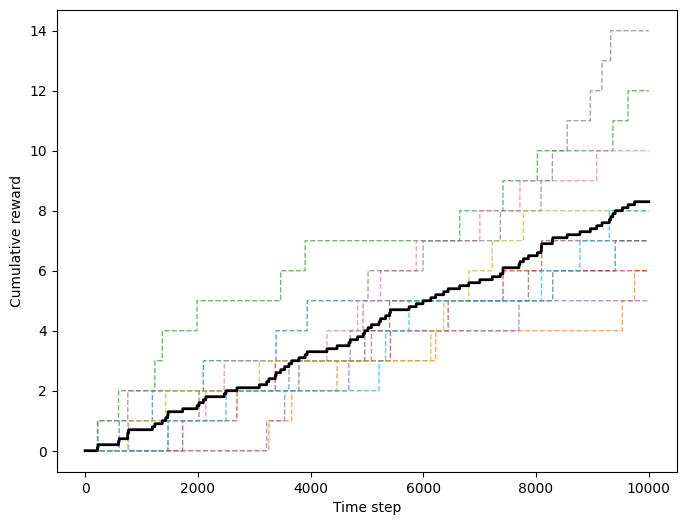

In [8]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10   
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0,disable=True):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False,disable=True):
            
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            action = random.choice(["UP", "DOWN", "LEFT", "RIGHT"])  # RANDOM POLICY
                       
            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state
                
        print(f"Trial {e+1}: Total cumulative reward for random policy = {reward_counter}")
        # save the rewards
        rewards_list.append(reward_per_trial)
# PLOT THE RESULTS
plot_func(rewards_list)

<span style="color:green">Comparison of Random and Manual Policies</span>

**Random Policy**: A random policy choose moves according to a uniform distribution over the space regardless of   the current state or outcomes, thereby it is not only maximising exploration but also resulting in a high proportion of inefficient actions and minimal performance.

**Manual policy**: As this policy steered by human intuition and knowledge of environmental structures, it might take advantage of some of the structure of the environment, at the cost of being subject to human cognitive biases and only a partial understanding of the actions that could optimise performance.

<span style="color:green">What are some reasons for the difference in performance?</span>

Some Reasons for Performance Differences:

* **Exploitation vs. Exploration**: A manual policy may contain preprogrammed, fixed ways of exploiting patterns or actions in the environment ahead, and as a result, achieving goals in a shorter time. On the other hand, a random policy can act freely, which means it can cover more space within an environment and can stumble on such things as hidden rewards or the best paths which are not complemented in a manual policy.
* **Human Limitations**: Manual policies have several drawbacks, the greatest of which are that they depend on human factors such as cognition, which can be based on prejudice or a lack of information. Perhaps, a random policy might be able to look for more desirable solutions than those offered by these restrained choices.
* **Environmental Complexity**: The another factor which could be attributed to is the complexity of the environment. For instance, in simple forms, policy might involve using a manual policy to look for good solutions but in other complicated environments, the policy might require being a random policy or even having a better learning algorithm.


# 4 Implement better & worse policies against the Random Policy

<span style="color:green; font-size:30px;"><b>Worst policy</span>

The worst policy sets the **robot going up and down only**. However, because the environment is stochastic, there is a 10% chance each it will randomly move left or right instead of truly going up and down. This small chance of moving horizontally helps the robot occasionally pass through doorways to enter into different parts of the rooms. When these random movements to the left or right result in an accident of good fortune, eventually the robot will hit the goal and get a reward. When this occurs, the robot is reset to the starting position and the process repeats.



<span style="color:green; font-size:30px;"><b>Better policy</span>

I  implemented an epsilon-greedy policy that balances exploration against exploitation. I start the robot in exploring 50 percent of the time-that is, it chooses a random action-and 50 (epsilon = 0.5) percent of the time it exploits-that is, it chooses what it thinks is the best action. After each trial, this rate of exploration decays by 1 percent-that is, the robot over time focuses more on exploiting what it has learned. While exploiting, the agent makes moves that decrease the **Manhattan distance** towards the goal, right, left, up or down depending on position. Thus, the agent can make many different entrances to the goal in one trial and get the reward of 1. However, due to the balance between exploration and exploitation, rewards for every trial differ. However, the general performance of the robot outperforms a random one because it has continuously reduced distance to the goal with more frequent attainment of goals. The decay in exploration allows the robot to improve over time.

**worst policy**

Trial 1: Total cumulative reward = 6
Trial 2: Total cumulative reward = 2
Trial 3: Total cumulative reward = 1
Trial 4: Total cumulative reward = 4
Trial 5: Total cumulative reward = 1
Trial 6: Total cumulative reward = 4
Trial 7: Total cumulative reward = 2
Trial 8: Total cumulative reward = 1
Trial 9: Total cumulative reward = 2
Trial 10: Total cumulative reward = 2


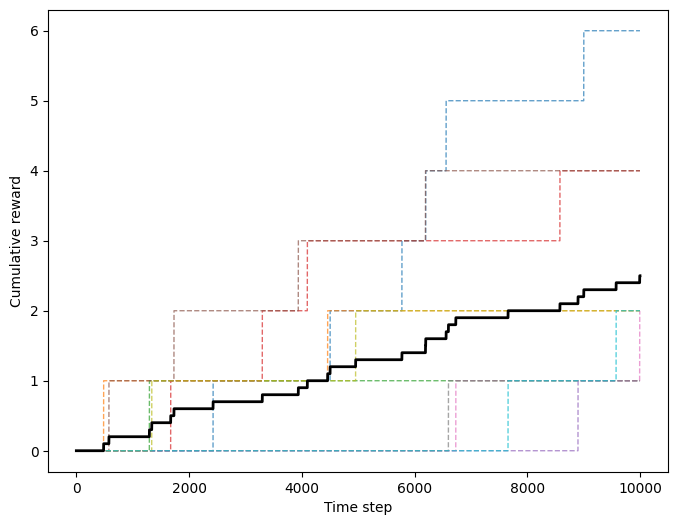

In [9]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10 
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0,disable=True):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
            
        # run each trial
        move_up = True  # A toggle for oscillating between UP and DOWN
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False,disable=True):
            
            
        # CODE HERE: please implement a policy that is worse than the random policy.
        # It should takes in the current state and output an action
            if move_up:
                action = "UP"
            else:
                action = "DOWN"  
                         
            move_up = not move_up  # Toggle the action for next step
            
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state
                
        print(f"Trial {e+1}: Total cumulative reward = {reward_counter}")
        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)

**Better policy: epsilon-greedy policy**

Trial 1: Total cumulative reward for better policy = 17
Trial 2: Total cumulative reward for better policy = 14
Trial 3: Total cumulative reward for better policy = 14
Trial 4: Total cumulative reward for better policy = 17
Trial 5: Total cumulative reward for better policy = 12
Trial 6: Total cumulative reward for better policy = 14
Trial 7: Total cumulative reward for better policy = 18
Trial 8: Total cumulative reward for better policy = 23
Trial 9: Total cumulative reward for better policy = 14
Trial 10: Total cumulative reward for better policy = 15


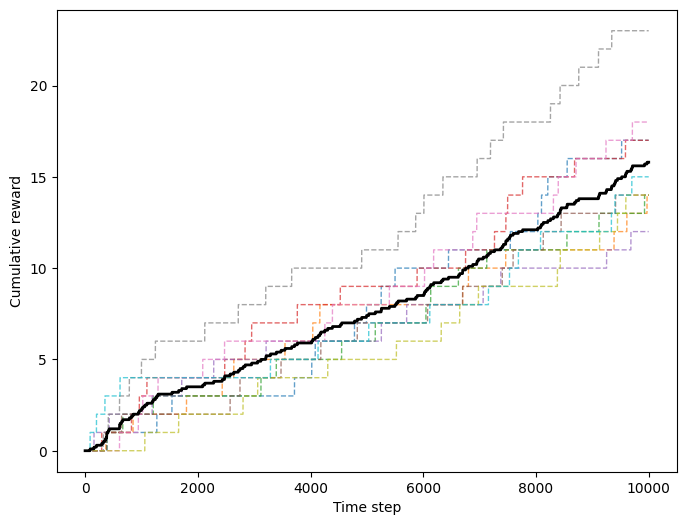

In [10]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # Initialize epsilion value for exploration and exploitation
    # Here I set the epsilon value high for more exploration
    epsilon = 0.5
    
    # epsilon decay parameters
    # Decay epsilon by 1% after each trial
    epsilon_decay = 0.99
    # Minimum epsilon to maintain some level of exploration 
    min_epsilon = 0.1 

    # save the rewards for plot
    rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0,disable=True):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
            
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False,disable=True):
            
            
        # CODE HERE: please implement a policy that is worse than the random policy.
        
            # Epsilon-Greedy policy with decay
            if random.random() < epsilon:
                # Exploration: Choose a random action
                action = random.choice(list(env.action_space.keys()))
            else:
                # reduce Manhattan distance to goal
                if state[0] < env.goal_state[0]:
                    action = "RIGHT"
                elif state[0] > env.goal_state[0]:
                    action = "LEFT"
                elif state[1] < env.goal_state[1]:
                    action = "UP"
                else:
                    action = "DOWN"
            
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state
                
        print(f"Trial {e+1}: Total cumulative reward for better policy = {reward_counter}")
        # save the rewards
        rewards_list.append(reward_per_trial)
        
        # Decay epsilon after each trial (gradually reduce exploration)
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        
# PLOT THE RESULTS
plot_func(rewards_list)